# amazon.in text mining and emotion mining

In [1]:
import pandas as pd
import numpy as np

import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs


In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\parsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\parsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\parsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
Apple_iPhone_13_Pro_reviews=[]


In [4]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/Apple-iPhone-13-Pro-256GB/product-reviews/B09G99BKK4/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
        Apple_iPhone_13_Pro_reviews = Apple_iPhone_13_Pro_reviews+op

In [5]:
Apple_iPhone_13_Pro_reviews

['\n\n  It’s a PRO in every sense.Display, cameras, A15 bionic chip, Pro motion display - the combination is deadly with great battery life. If you have iPhone 12 Pro or 12 Pro max, there’s no need to upgrade. But if you have older iPhones or say X or 11 also, go for this. I have upgraded from iPhone X (used that for close to 4 years now) to 13 Pro now and trust me there’s a massive difference in the performance, camera etc.And this new colour is stunning…Sierra Blue gonna be the fav iPhone colour this season.If budget if not an issue, then go for the Pro or Pro max model :)\n\n',
 '\n\n  It’s a PRO in every sense.Display, cameras, A15 bionic chip, Pro motion display - the combination is deadly with great battery life. If you have iPhone 12 Pro or 12 Pro max, there’s no need to upgrade. But if you have older iPhones or say X or 11 also, go for this. I have upgraded from iPhone X (used that for close to 4 years now) to 13 Pro now and trust me there’s a massive difference in the performa

In [6]:
Apple_iPhone_13_Pro_reviews = list(set(Apple_iPhone_13_Pro_reviews))

In [7]:
Apple_iPhone_13_Pro_reviews

['',
 '\n\n  Just received phone an hour ago. Amazed with the build quality and features, especially improvements to the camera. Other than that phone is bit heavy and lens of device looks huge.\n\n',
 '\n\n  For much too long, Apple has been shouting from the rooftops about how "pro" their top of the line smartphones were when they obviously lacked some very basic features and were too close for comfort to the entry level models. This year, the 13 pro series has been elevated significantly, widening the gap between themselves and the 13, while also bringing in the much needed Pro-motion display and pro-res videos. Pick the phone up and the build quality feels absolutely amazing, deserving of an ultra premium flagship. What I also like this year is that there\'s no feature disparity between the pro and the pro max like last year.The screen is awesome and the adaptive refresh rate makes it a way better experience than previous pros. Cameras get new lenses, and you will notice the improv

In [8]:
txt_upd = ' '.join(Apple_iPhone_13_Pro_reviews)

In [9]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [10]:
text_tokens = word_tokenize(txt_upd)

In [11]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

In [12]:
tf = TfidfVectorizer()

In [13]:
text_tf = tf.fit_transform(tokens_without_sw)

In [14]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

C:\Users\parsh\anaconda3\envs\practice\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
df

,absolutely,actually,adaptive,addition,ago,altogether,amazed,amazing,android,apple,...,whole,widening,wonders,words,worth,would,xdr,year,years,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
word_list = ' '.join(df)

In [17]:
wordcloud = WordCloud(background_color='black',
                      width=1800,
                      height=1400).generate(word_list)

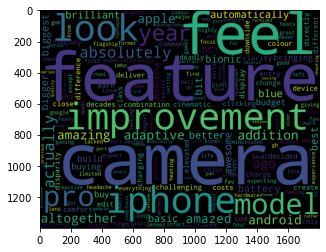

In [18]:
plt.imshow(wordcloud)

# Sentimental Analysis

In [19]:
with open("positive-words.txt","r") as pw:
    positive_words = pw.read().split("\n")

In [20]:
positive_words = positive_words[35:]

In [21]:
with open("negative-words.txt","r", encoding='latin-1') as nw:
    negative_words = nw.read().split("\n")

In [22]:
negative_words = negative_words[35:]

In [23]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])

In [24]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_neg_in_nw)

In [25]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [26]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)

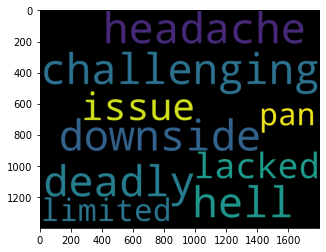

In [27]:
plt.imshow(wordcloud_neg)

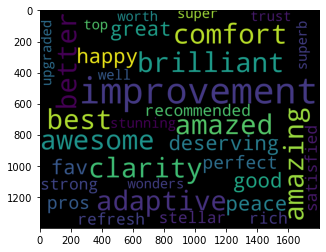

In [28]:
plt.imshow(wordcloud_pos)